In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn import metrics

from sklearn.metrics import mean_absolute_error
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate, StratifiedKFold, RepeatedStratifiedKFold, RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline
!pip install optuna
import optuna

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
!pip3 install catboost
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
import time

In [2]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_train.columns = df_train.columns.str.lower().str.replace(' ', '_')
print(df_train.columns)
train_ids=df_train['passengerid'].values
print(df_train.shape)
print(df_train.info())

df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
df_test.columns = df_test.columns.str.lower().str.replace(' ', '_')
test_ids=df_test['passengerid'].values
print(df_test.shape)
print(df_test.info())

df_train.sample(30)

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')
(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
(418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 t

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
444,445,1,3,"Johannesen-Bratthammer, Mr. Bernt",male,NaN,0,0,65306,8.1125,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
157,158,0,3,"Corn, Mr. Harry",male,30.0,0,0,SOTON/OQ 392090,8.0500,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S
393,394,1,1,"Newell, Miss. Marjorie",female,23.0,1,0,35273,113.2750,D36,C
603,604,0,3,"Torber, Mr. Ernst William",male,44.0,0,0,364511,8.0500,NaN,S
667,668,0,3,"Rommetvedt, Mr. Knud Paust",male,NaN,0,0,312993,7.7750,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S


In [3]:
def null_count_with_percent(df):
  total = df.isnull().sum().sort_values(ascending=False)
  percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
  missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
  return missing_data

In [4]:
print(null_count_with_percent(df_train))
print(null_count_with_percent(df_test))

             Total   Percent
cabin          687  0.771044
age            177  0.198653
embarked         2  0.002245
passengerid      0  0.000000
survived         0  0.000000
pclass           0  0.000000
name             0  0.000000
sex              0  0.000000
sibsp            0  0.000000
parch            0  0.000000
ticket           0  0.000000
fare             0  0.000000
             Total   Percent
cabin          327  0.782297
age             86  0.205742
fare             1  0.002392
passengerid      0  0.000000
pclass           0  0.000000
name             0  0.000000
sex              0  0.000000
sibsp            0  0.000000
parch            0  0.000000
ticket           0  0.000000
embarked         0  0.000000


**i'll drop capin because the null values are more than 40%**

In [5]:
df_train=df_train.drop(columns='cabin')
df_test=df_test.drop(columns='cabin')

**handle age null values**

In [6]:
ImputedModule = SimpleImputer(strategy='mean').set_output(transform="pandas")
X=df_train['age'].values.reshape(-1, 1)
ImputedX = ImputedModule.fit(X)
X = ImputedX.transform(X)
df_train['age']=X

ImputedModule = SimpleImputer(strategy='mean').set_output(transform="pandas")
X=df_test['age'].values.reshape(-1, 1)
ImputedX = ImputedModule.fit(X)
X = ImputedX.transform(X)
df_test['age']=X

**handle embarked null values on train data**

In [7]:
print(df_train.embarked.value_counts())

embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [8]:
ImputedModule = SimpleImputer(strategy='constant', fill_value='messing').set_output(transform="pandas")
X=df_train['embarked'].values.reshape(-1, 1)
ImputedX = ImputedModule.fit(X)
X = ImputedX.transform(X)
df_train['embarked']=X

**handle fare null on test data**

In [9]:
print(df_test.fare.value_counts())

fare
7.7500     21
26.0000    19
13.0000    17
8.0500     17
7.8958     11
           ..
7.8208      1
8.5167      1
78.8500     1
52.0000     1
22.3583     1
Name: count, Length: 169, dtype: int64


In [10]:
ImputedModule = SimpleImputer(strategy='mean').set_output(transform="pandas")
X=df_test['fare'].values.reshape(-1, 1)
ImputedX = ImputedModule.fit(X)
X = ImputedX.transform(X)
df_test['fare']=X

In [11]:
print(null_count_with_percent(df_train))
print(null_count_with_percent(df_test))

             Total  Percent
passengerid      0      0.0
survived         0      0.0
pclass           0      0.0
name             0      0.0
sex              0      0.0
age              0      0.0
sibsp            0      0.0
parch            0      0.0
ticket           0      0.0
fare             0      0.0
embarked         0      0.0
             Total  Percent
passengerid      0      0.0
pclass           0      0.0
name             0      0.0
sex              0      0.0
age              0      0.0
sibsp            0      0.0
parch            0      0.0
ticket           0      0.0
fare             0      0.0
embarked         0      0.0


**no more null data !!**

# **EDA**

In [12]:
target='survived'

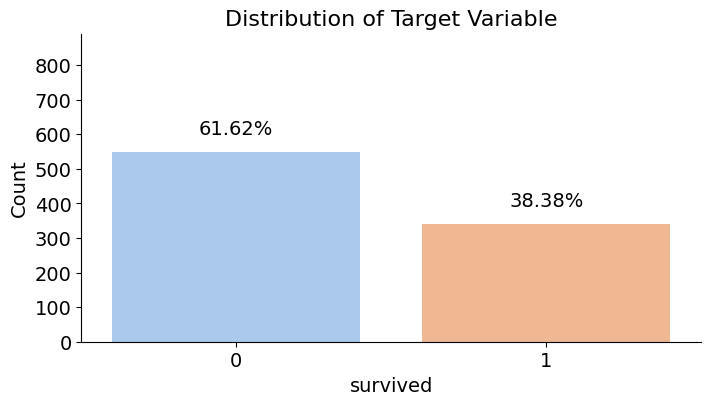

In [13]:
class_counts = df_train[target].value_counts()
class_proportions = class_counts / df_train.shape[0]
class_proportions = class_proportions.values.tolist()
class_proportions_str = [f'{prop:.2%}' for prop in class_proportions]

# Set the color palette
colors = sns.color_palette('pastel')[0:len(class_counts)]

# Plot the distribution of the target variable
plt.figure(figsize=(8, 4))
sns.countplot(x=target, data=df_train, palette=colors)
plt.title('Distribution of Target Variable', fontsize=16)
plt.xlabel(target, fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.ylim([0, len(df_train)])
for i, count in enumerate(class_counts):
    plt.text(i, count + 50, class_proportions_str[i], ha='center', fontsize=14, color='black')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()
plt.show()

In [14]:
def survived_bar_plot(feature):
    plt.figure(figsize = (6,4))
    sns.barplot(data = df_train , x = feature , y = target).set_title(f"{feature}  ")
    plt.show()
    
def survived_table(feature):
    return df_train[[feature, target]].groupby([feature], as_index=False).mean().sort_values(by=target, ascending=False).style.background_gradient(low=0.75,high=1)

def survived_hist_plot(feature):
    plt.figure(figsize = (10,10))
    sns.histplot(data = df_train , x = feature , hue = target,binwidth=5,palette = sns.color_palette(["yellow" , "green"]) ,multiple = "stack" ).set_title(f"{feature} Vs ")
    plt.show()

In [15]:
df_train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked'],
      dtype='object')

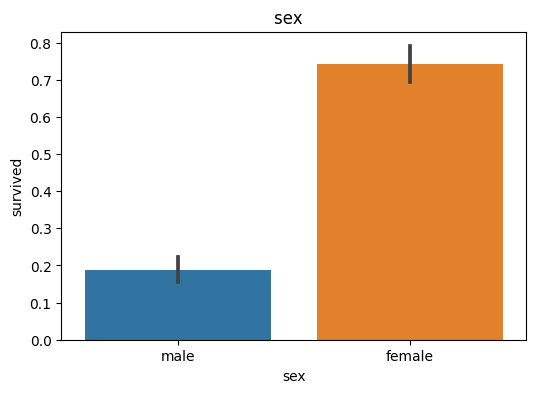

In [16]:
survived_bar_plot('sex')

In [17]:
survived_table('sex')

,sex,survived
0,female,0.742038
1,male,0.188908


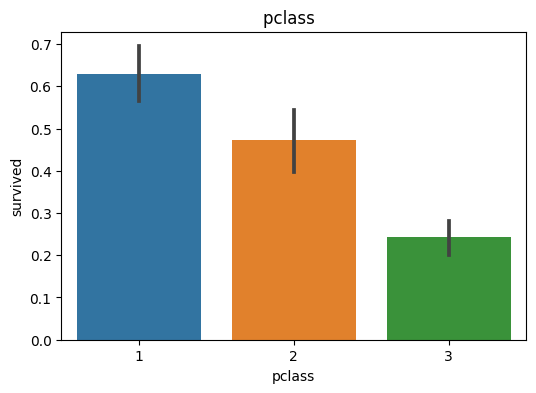

In [18]:
survived_bar_plot('pclass')

In [19]:
survived_table('pclass')

,pclass,survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


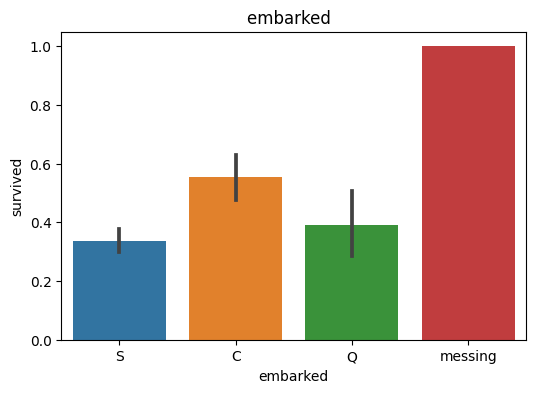

In [20]:
survived_bar_plot('embarked')

In [21]:
survived_table('embarked')

,embarked,survived
3,messing,1.000000
0,C,0.553571
1,Q,0.389610
2,S,0.336957


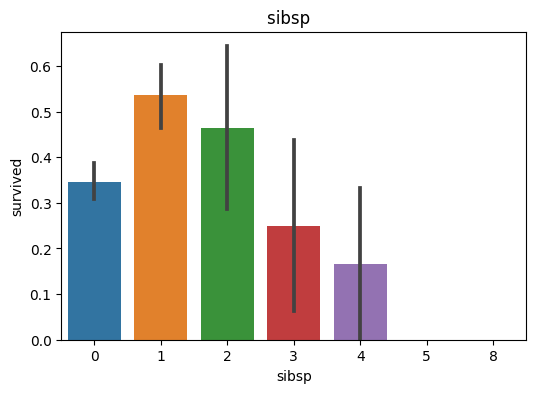

In [22]:
survived_bar_plot('sibsp')

In [23]:
survived_table('sibsp')

,sibsp,survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


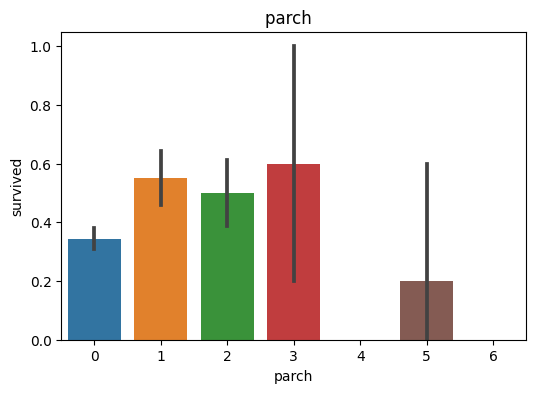

In [24]:
survived_bar_plot('parch')

In [25]:
survived_table('parch')

,parch,survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


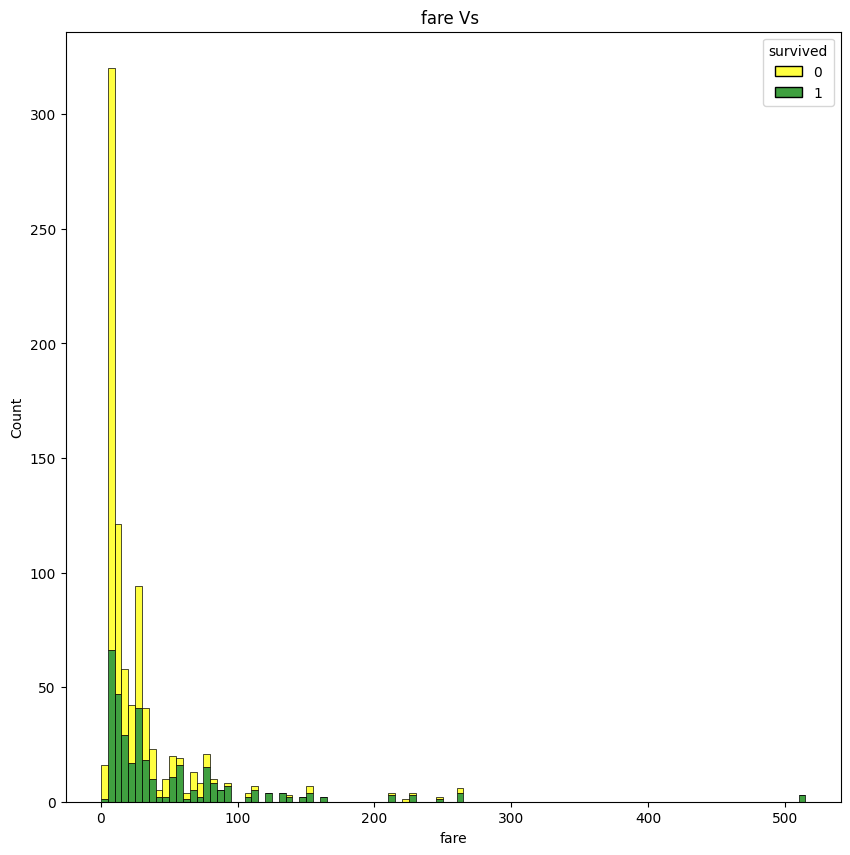

In [26]:
survived_hist_plot('fare')

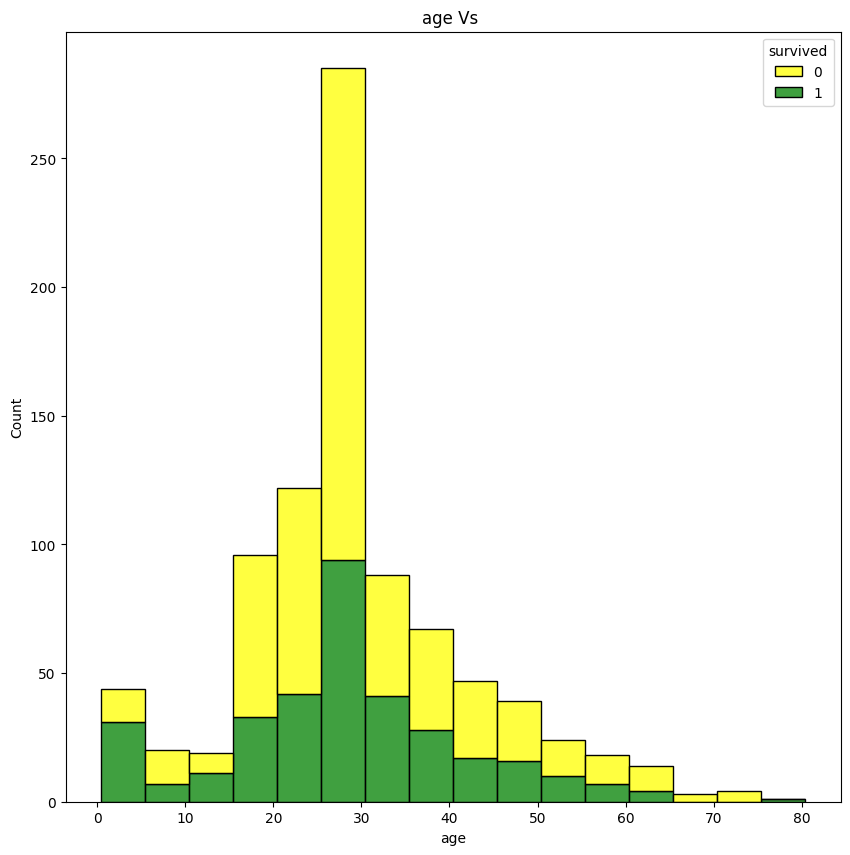

In [27]:
survived_hist_plot('age')

**age vs pclass vs target**

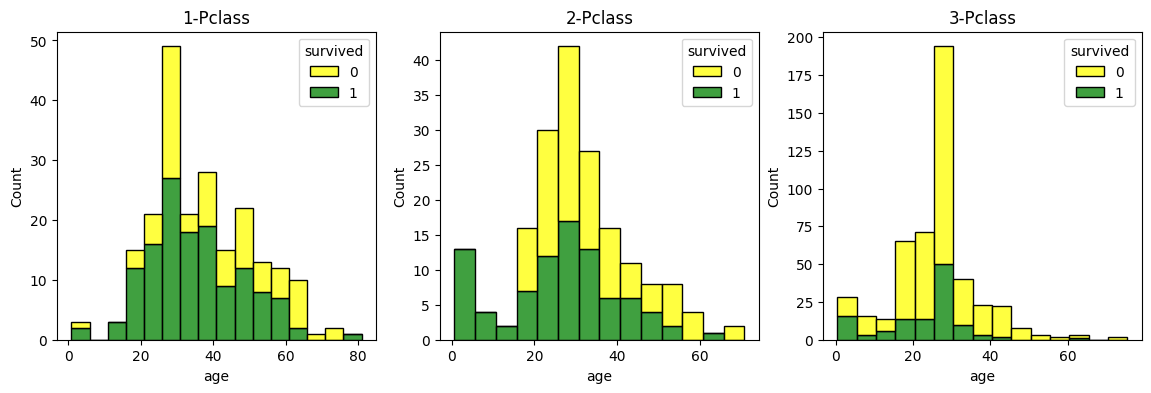

In [28]:
plot , ax = plt.subplots(1 , 3 , figsize=(14,4))
sns.histplot(data = df_train.loc[df_train["pclass"]==1] , x = "age" , hue = target,binwidth=5,ax = ax[0],palette = sns.color_palette(["yellow" , "green"]),multiple = "stack").set_title("1-Pclass")
sns.histplot(data = df_train.loc[df_train["pclass"]==2] , x = "age" , hue = target,binwidth=5,ax = ax[1],palette = sns.color_palette(["yellow" , "green"]),multiple = "stack").set_title("2-Pclass")
sns.histplot(data = df_train.loc[df_train["pclass"]==3] , x = "age" , hue = target,binwidth=5,ax = ax[2],palette = sns.color_palette(["yellow" , "green"]),multiple = "stack").set_title("3-Pclass")
plt.show()

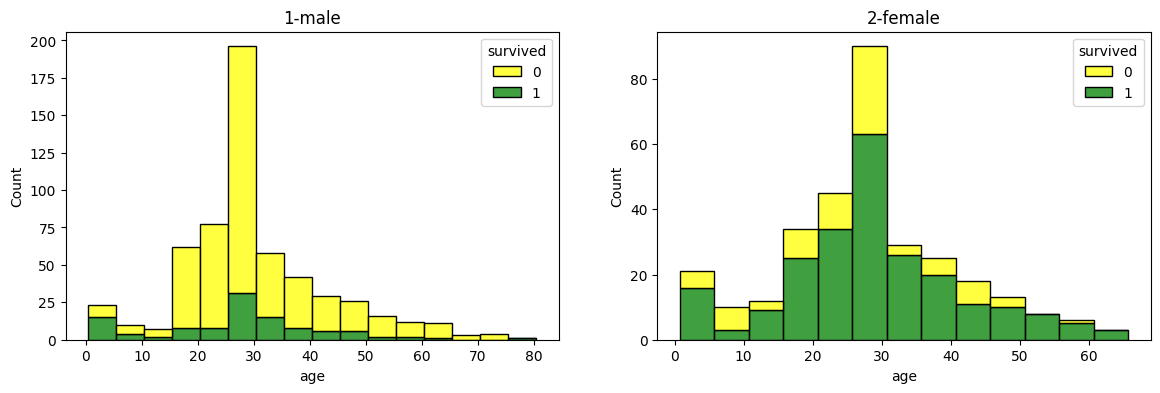

In [29]:
plot , ax = plt.subplots(1 ,2 , figsize=(14,4))
sns.histplot(data = df_train.loc[df_train["sex"]=='male'] , x = "age" , hue = target,binwidth=5,ax = ax[0],palette = sns.color_palette(["yellow" , "green"]),multiple = "stack").set_title("1-male")
sns.histplot(data = df_train.loc[df_train["sex"]=='female'] , x = "age" , hue = target,binwidth=5,ax = ax[1],palette = sns.color_palette(["yellow" , "green"]),multiple = "stack").set_title("2-female")
plt.show()

# **Feature Engineering**

In [30]:
df_train['family_size'] = df_train['sibsp'] + df_train['parch'] + 1
df_test['family_size'] = df_test['sibsp'] + df_test['parch'] + 1

In [31]:
survived_table('family_size')

,family_size,survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [32]:
df_train['is_alone'] = df_train['family_size'].map(lambda x: 1 if x == 1 else 0).astype(bool)
df_train['family_small'] = df_train['family_size'].map(lambda x: 1 if x == 2 else 0)
df_train['family_med'] = df_train['family_size'].map(lambda x: 1 if 3 <= x <= 4 else 0)
df_train['family_big'] = df_train['family_size'].map(lambda x: 1 if x >= 5 else 0)



df_test['is_alone'] = df_test['family_size'].map(lambda x: 1 if x == 1 else 0).astype(bool)
df_test['family_small'] = df_test['family_size'].map(lambda x: 1 if x == 2 else 0)
df_test['family_med'] = df_test['family_size'].map(lambda x: 1 if 3 <= x <= 4 else 0)
df_test['family_big'] = df_test['family_size'].map(lambda x: 1 if x >= 5 else 0)


df_train=df_train.drop(columns=['family_size','parch','sibsp'])
df_test=df_test.drop(columns=['family_size','parch','sibsp'])



In [33]:
df_train['title']=df_train.name.str.extract(' ([A-Za-z]+)\.', expand=False)
title_names = (df_train['title'].value_counts() < 5)
df_train['title'] = df_train['title'].apply(lambda x: 'rare' if title_names.loc[x] == True else x)

df_test['title']=df_test.name.str.extract(' ([A-Za-z]+)\.', expand=False)
title_names = (df_test['title'].value_counts() < 5)
df_test['title'] = df_test['title'].apply(lambda x: 'rare' if title_names.loc[x] == True else x)


survived_table('title')

,title,survived
4,Mrs,0.792000
2,Miss,0.697802
6,rare,0.642857
1,Master,0.575000
0,Dr,0.428571
3,Mr,0.156673
5,Rev,0.000000


In [34]:
df_train['is_mrs'] = df_train['title'].map(lambda x: 1 if x == 'Mrs' else 0)
df_train['is_miss'] = df_train['title'].map(lambda x: 1 if x == 'Miss' else 0)
df_train['is_master'] = df_train['title'].map(lambda x: 1 if x == 'Master' else 0)



df_test['is_mrs'] = df_test['title'].map(lambda x: 1 if x == 'Mrs' else 0)
df_test['is_miss'] = df_test['title'].map(lambda x: 1 if x == 'Miss' else 0)
df_test['is_master'] = df_test['title'].map(lambda x: 1 if x == 'Master' else 0)


df_train=df_train.drop(columns=['title','name'])
df_test=df_test.drop(columns=['title','name'])




In [35]:
df_train=df_train.drop(columns=['ticket'])
df_test=df_test.drop(columns=['ticket'])

df_train

,passengerid,survived,pclass,sex,age,fare,embarked,is_alone,family_small,family_med,family_big,is_mrs,is_miss,is_master
0,1,0,3,male,22.000000,7.2500,S,False,1,0,0,0,0,0
1,2,1,1,female,38.000000,71.2833,C,False,1,0,0,1,0,0
2,3,1,3,female,26.000000,7.9250,S,True,0,0,0,0,1,0
3,4,1,1,female,35.000000,53.1000,S,False,1,0,0,1,0,0
4,5,0,3,male,35.000000,8.0500,S,True,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,13.0000,S,True,0,0,0,0,0,0
887,888,1,1,female,19.000000,30.0000,S,True,0,0,0,0,1,0
888,889,0,3,female,29.699118,23.4500,S,False,0,1,0,0,1,0
889,890,1,1,male,26.000000,30.0000,C,True,0,0,0,0,0,0


In [36]:
df_train['fare_band'] = pd.qcut(df_train['fare'], 4)
df_train[['fare_band', target]].groupby(['fare_band'], as_index=False).mean().sort_values(by='fare_band', ascending=False)

,fare_band,survived
3,"(31.0, 512.329]",0.581081
2,"(14.454, 31.0]",0.454955
1,"(7.91, 14.454]",0.303571
0,"(-0.001, 7.91]",0.197309


In [37]:
df_train.loc[ df_train['fare'] <= 7.91, 'fare'] = 0
df_train.loc[(df_train['fare'] > 7.91) & (df_train['fare'] <= 14.454), 'fare'] = 1
df_train.loc[(df_train['fare'] > 14.454) & (df_train['fare'] <= 31), 'fare']   = 2
df_train.loc[ df_train['fare'] > 31, 'fare'] = 3
df_train['fare'] = df_train['fare'].astype(int)



df_test.loc[ df_test['fare'] <= 7.91, 'fare'] = 0
df_test.loc[(df_test['fare'] > 7.91) & (df_test['fare'] <= 14.454), 'fare'] = 1
df_test.loc[(df_test['fare'] > 14.454) & (df_test['fare'] <= 31), 'fare']   = 2
df_test.loc[ df_test['fare'] > 31, 'fare'] = 3
df_test['fare'] = df_test['fare'].astype(int)


df_train=df_train.drop(columns=['fare_band'])
df_train

,passengerid,survived,pclass,sex,age,fare,embarked,is_alone,family_small,family_med,family_big,is_mrs,is_miss,is_master
0,1,0,3,male,22.000000,0,S,False,1,0,0,0,0,0
1,2,1,1,female,38.000000,3,C,False,1,0,0,1,0,0
2,3,1,3,female,26.000000,1,S,True,0,0,0,0,1,0
3,4,1,1,female,35.000000,3,S,False,1,0,0,1,0,0
4,5,0,3,male,35.000000,1,S,True,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,1,S,True,0,0,0,0,0,0
887,888,1,1,female,19.000000,2,S,True,0,0,0,0,1,0
888,889,0,3,female,29.699118,2,S,False,0,1,0,0,1,0
889,890,1,1,male,26.000000,2,C,True,0,0,0,0,0,0


In [38]:
df_train['age_band'] = pd.cut(df_train['age'], 5)
df_train[['age_band', target]].groupby(['age_band'], as_index=False).mean().sort_values(by='age_band', ascending=True)

,age_band,survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.344168
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [39]:
df_train.loc[ df_train['age'] <= 16, 'age'] = 0
df_train.loc[(df_train['age'] > 16) & (df_train['age'] <= 32), 'age'] = 1
df_train.loc[(df_train['age'] > 32) & (df_train['age'] <= 48), 'age'] = 2
df_train.loc[(df_train['age'] > 48) & (df_train['age'] <= 64), 'age'] = 3
df_train.loc[ df_train['age'] > 64, 'age']

df_test.loc[ df_test['age'] <= 16, 'age'] = 0
df_test.loc[(df_test['age'] > 16) & (df_test['age'] <= 32), 'age'] = 1
df_test.loc[(df_test['age'] > 32) & (df_test['age'] <= 48), 'age'] = 2
df_test.loc[(df_test['age'] > 48) & (df_test['age'] <= 64), 'age'] = 3
df_test.loc[ df_test['age'] > 64, 'age']

df_train=df_train.drop(columns=['age_band'])

In [40]:
df_train.to_csv('train_backup.csv')
df_test.to_csv('test_backup.csv')

**One Hot Encoding**

In [41]:
cat_feat=['sex','embarked','pclass']

cats_encoded=[]

for cat in cat_feat:
  df_train[cat]= df_train[cat].astype('category')
  df_train[cat+'_encoded'] = df_train[cat].cat.codes
    
  df_test[cat]= df_test[cat].astype('category')
  df_test[cat+'_encoded'] = df_test[cat].cat.codes
    
  cats_encoded.append(cat+"_encoded")


one_hot_encoded_data = pd.get_dummies(df_train[cats_encoded], columns =cats_encoded)
df_train[one_hot_encoded_data.columns]=one_hot_encoded_data.values
df_train=df_train.drop(columns=cat_feat)
df_train=df_train.drop(columns=cats_encoded)

one_hot_encoded_data_test = pd.get_dummies(df_test[cats_encoded], columns =cats_encoded)
df_test[one_hot_encoded_data_test.columns]=one_hot_encoded_data_test.values
df_test=df_test.drop(columns=cat_feat)
df_test=df_test.drop(columns=cats_encoded)



print(df_train.shape)
print(df_train.columns)

print(df_test.shape)
print(df_test.columns)


(891, 20)
Index(['passengerid', 'survived', 'age', 'fare', 'is_alone', 'family_small',
       'family_med', 'family_big', 'is_mrs', 'is_miss', 'is_master',
       'sex_encoded_0', 'sex_encoded_1', 'embarked_encoded_0',
       'embarked_encoded_1', 'embarked_encoded_2', 'embarked_encoded_3',
       'pclass_encoded_0', 'pclass_encoded_1', 'pclass_encoded_2'],
      dtype='object')
(418, 18)
Index(['passengerid', 'age', 'fare', 'is_alone', 'family_small', 'family_med',
       'family_big', 'is_mrs', 'is_miss', 'is_master', 'sex_encoded_0',
       'sex_encoded_1', 'embarked_encoded_0', 'embarked_encoded_1',
       'embarked_encoded_2', 'pclass_encoded_0', 'pclass_encoded_1',
       'pclass_encoded_2'],
      dtype='object')


In [42]:
df_train.embarked_encoded_3.value_counts()

embarked_encoded_3
False    889
True       2
Name: count, dtype: int64

**embarked_encoded_3 in train data is the null values i handled ,ill drop it**

In [43]:
df_train=df_train.drop(columns='embarked_encoded_3')

print(df_train.shape)

print(df_test.shape)


(891, 19)
(418, 18)


In [44]:
df_train

,passengerid,survived,age,fare,is_alone,family_small,family_med,family_big,is_mrs,is_miss,is_master,sex_encoded_0,sex_encoded_1,embarked_encoded_0,embarked_encoded_1,embarked_encoded_2,pclass_encoded_0,pclass_encoded_1,pclass_encoded_2
0,1,0,1.0,0,False,1,0,0,0,0,0,False,True,False,False,True,False,False,True
1,2,1,2.0,3,False,1,0,0,1,0,0,True,False,True,False,False,True,False,False
2,3,1,1.0,1,True,0,0,0,0,1,0,True,False,False,False,True,False,False,True
3,4,1,2.0,3,False,1,0,0,1,0,0,True,False,False,False,True,True,False,False
4,5,0,2.0,1,True,0,0,0,0,0,0,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,1.0,1,True,0,0,0,0,0,0,False,True,False,False,True,False,True,False
887,888,1,1.0,2,True,0,0,0,0,1,0,True,False,False,False,True,True,False,False
888,889,0,1.0,2,False,0,1,0,0,1,0,True,False,False,False,True,False,False,True
889,890,1,1.0,2,True,0,0,0,0,0,0,False,True,True,False,False,True,False,False


**Correlation between data and target**

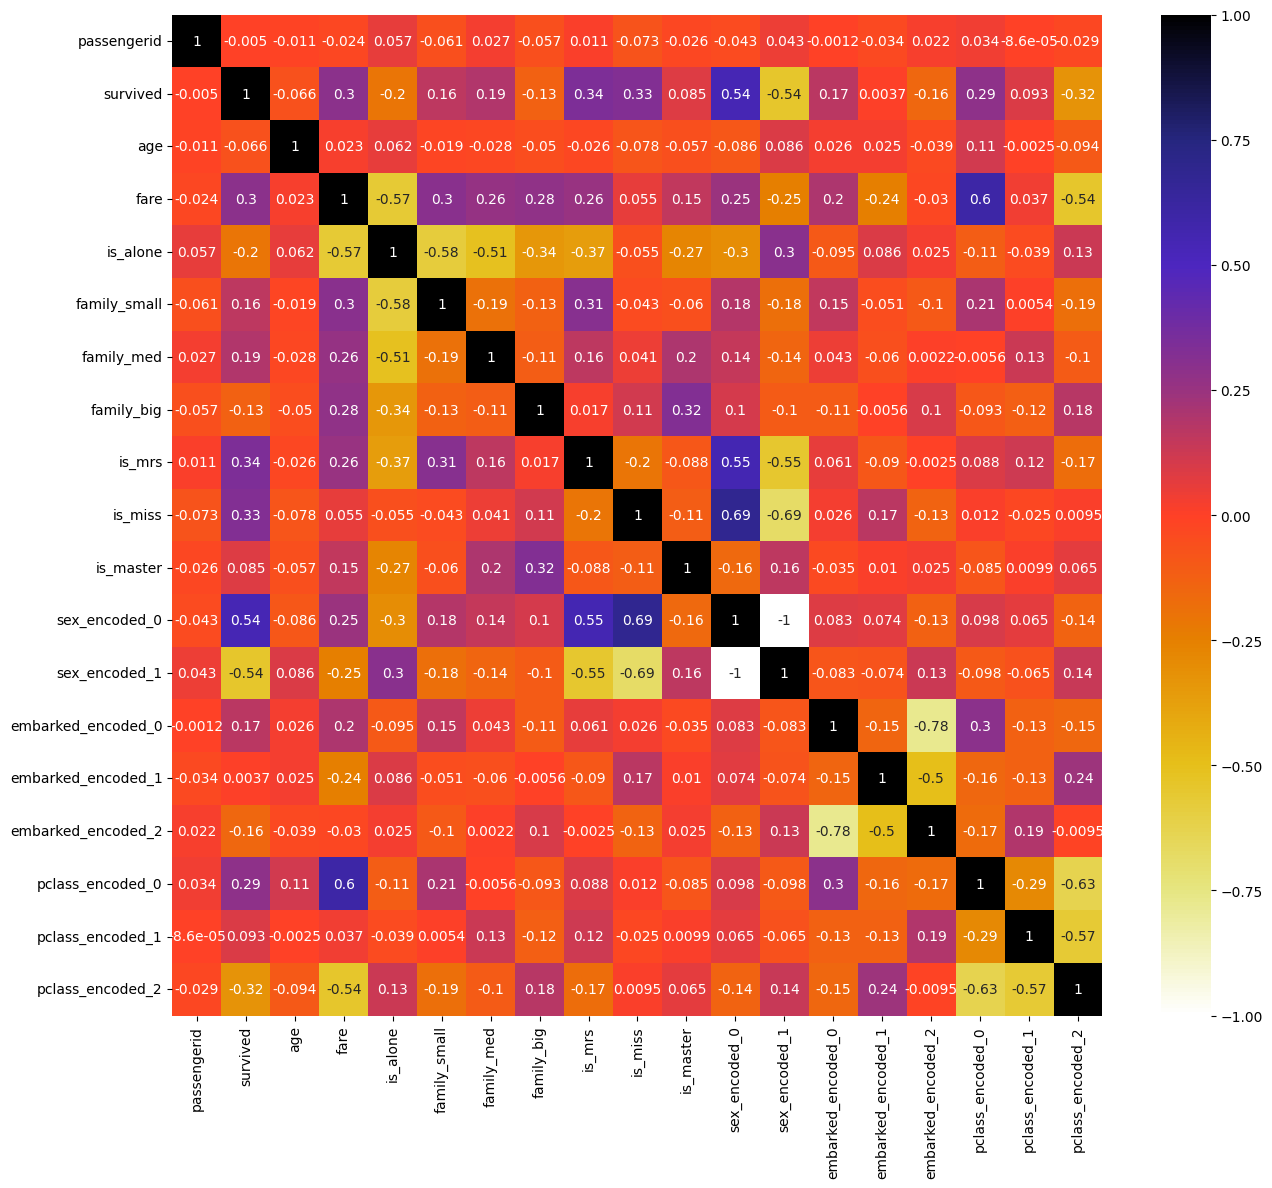

In [45]:
plt.figure(figsize=(15,13))
cor = df_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [46]:
# selected 
df_tra=df_train.copy()

**VERY GOOD !! I have good correlations with the target**

# **Split data to train and test**

In [47]:
X=df_train[df_train.columns.difference(['passengerid',target])].values
print(X.shape)
Y=df_train[target].values
print(Y.shape)

(891, 17)
(891,)


# Modelling

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,roc_auc_score

param ={'lambda': 1.2475525176000515,
        'learning_rate': 0.05,
        "objective": "binary:logistic",
        'colsample_bytree': 0.9,
        'subsample': 1.0, 
        'max_depth': 2,
        'min_child_weight': 3,
        "eval_metric": "auc"
        
       }




def xgboost_bin_classif(X, y, test_size=0.2, random_state=42, num_round=100):

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Create DMatrix for XGBoost
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    watchlist = [(dtrain, 'train'), (dtest, 'eval')]


    num_round = 5000
    evals_result = {}
    bst = xgb.train(params=param, dtrain=dtrain, num_boost_round=num_round,
                    evals_result=evals_result,
                    maximize=False, obj=None,
                    evals=watchlist, verbose_eval=200)
    y_pred = bst.predict(dtest)
    test_auc = roc_auc_score(y_test, y_pred)
    print(f"auc: {test_auc}")
    percentiles = np.arange(1, 100, 1)
    base_rate = (y == 1).sum() / y.shape[0]
    
    
    results = []
    for i,percentile in enumerate(percentiles):
        cutoff = np.percentile(y_pred, percentile)
        predictions = np.where(y_pred >= cutoff, 1, 0)
        cm = confusion_matrix(y_test, predictions, labels=[0,1]).copy()

        tp = cm[0,0]
        precision = tp / cm[:,0].sum()
        recall = tp / cm[0,:].sum()
        accuracy = cm.diagonal().sum() / cm.sum()
        f1score = 2 * (precision * recall) / (precision + recall)
        lift = precision/base_rate

        res = dict(
            percentile=percentile,
            cutoff = cutoff,
            precision=precision,
            recall=recall,
            lift=lift,
            f1score=f1score,
            accuracy=accuracy,
        )

        results.append(res)
    
    results = pd.DataFrame(results)
    cut_off=0.415098
    predictions = np.where(y_pred > cut_off, 1, 0)
    cm = confusion_matrix(y_test, predictions, labels=[1,0])

    # df_result = pd.DataFrame({
    # 'target': y_test,
    # 'predected': y_pred
    #  })




    return bst,test_auc,results,cm 

In [49]:
bst,auc,results,cm=xgboost_bin_classif(X,Y)

[0]	train-auc:0.81699	eval-auc:0.80631
[200]	train-auc:0.88732	eval-auc:0.89607
[400]	train-auc:0.89328	eval-auc:0.89846
[600]	train-auc:0.89659	eval-auc:0.89575
[800]	train-auc:0.89872	eval-auc:0.89344
[1000]	train-auc:0.89889	eval-auc:0.89408
[1200]	train-auc:0.90186	eval-auc:0.89858
[1400]	train-auc:0.90352	eval-auc:0.89923
[1600]	train-auc:0.90372	eval-auc:0.89910
[1800]	train-auc:0.90467	eval-auc:0.89910
[2000]	train-auc:0.90562	eval-auc:0.90013
[2200]	train-auc:0.90644	eval-auc:0.90167
[2400]	train-auc:0.90779	eval-auc:0.90296
[2600]	train-auc:0.90856	eval-auc:0.90245
[2800]	train-auc:0.90904	eval-auc:0.90322
[3000]	train-auc:0.90904	eval-auc:0.90347
[3200]	train-auc:0.90961	eval-auc:0.90322
[3400]	train-auc:0.90967	eval-auc:0.90438
[3600]	train-auc:0.91050	eval-auc:0.90257
[3800]	train-auc:0.91073	eval-auc:0.90283
[4000]	train-auc:0.91125	eval-auc:0.90347
[4200]	train-auc:0.91132	eval-auc:0.90347
[4400]	train-auc:0.91175	eval-auc:0.90167
[4600]	train-auc:0.91231	eval-auc:0.90193

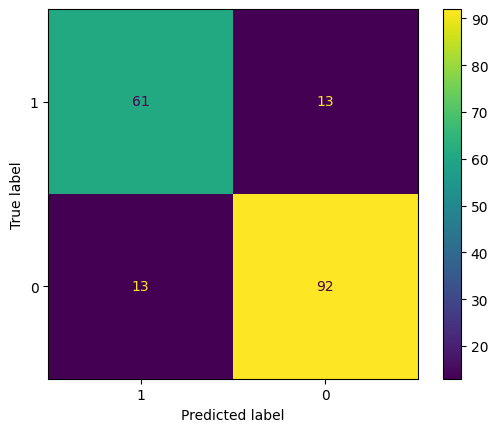

In [50]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[1,0])
disp.plot()

In [51]:
x = results[results.percentile.isin( np.arange(0, 100, 5) )]
x.set_index("percentile")

,cutoff,precision,recall,lift,f1score,accuracy
percentile,,,,,,
5,0.017676,1.000000,0.076190,2.605263,0.141593,0.458101
10,0.069727,1.000000,0.161905,2.605263,0.278689,0.508380
15,0.095428,0.961538,0.238095,2.505061,0.381679,0.547486
20,0.105130,0.967742,0.285714,2.521222,0.441176,0.575419
25,0.107818,0.947368,0.342857,2.468144,0.503497,0.603352
30,0.107818,0.947368,0.342857,2.468144,0.503497,0.603352
35,0.160297,0.952381,0.571429,2.481203,0.714286,0.731844
40,0.180408,0.952381,0.571429,2.481203,0.714286,0.731844
45,0.228289,0.925926,0.714286,2.412281,0.806452,0.798883


In [52]:
submission_test =bst.predict(xgb.DMatrix(df_test[df_test.columns.difference(['passengerid'])].values))


In [53]:
cut_off=0.415098
predictions = np.where(submission_test > cut_off, 1, 0)


In [54]:
pd.Series(predictions).value_counts()

0    252
1    166
Name: count, dtype: int64

# Submission

In [55]:
print(predictions.shape)

sub=pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

# Add predictions
sub['Survived']=predictions

sub.to_csv('submission.csv', index=False)

(418,)
